In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [3]:
%config Completer.use_jedi = False  # 자동완성 속도 증가

In [4]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
tf.Tensor(19.6, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [5]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                   np.ones((num_samples_per_class, 1), dtype='float32')))

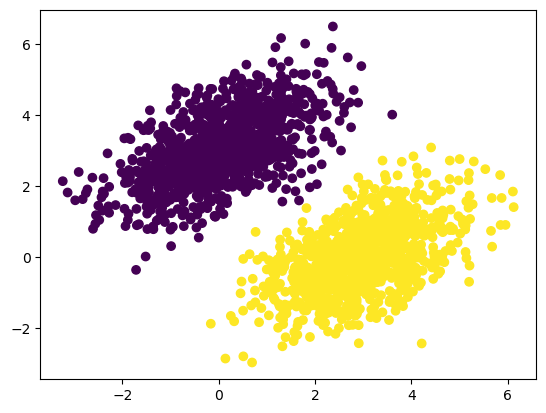

In [7]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [8]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [9]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [10]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [11]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [12]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss:.4f}')

0번째 스텝의 손실 : 0.6464
1번째 스텝의 손실 : 0.1507
2번째 스텝의 손실 : 0.1051
3번째 스텝의 손실 : 0.0926
4번째 스텝의 손실 : 0.0855
5번째 스텝의 손실 : 0.0798
6번째 스텝의 손실 : 0.0746
7번째 스텝의 손실 : 0.0700
8번째 스텝의 손실 : 0.0657
9번째 스텝의 손실 : 0.0619
10번째 스텝의 손실 : 0.0584
11번째 스텝의 손실 : 0.0552
12번째 스텝의 손실 : 0.0523
13번째 스텝의 손실 : 0.0497
14번째 스텝의 손실 : 0.0474
15번째 스텝의 손실 : 0.0452
16번째 스텝의 손실 : 0.0432
17번째 스텝의 손실 : 0.0415
18번째 스텝의 손실 : 0.0398
19번째 스텝의 손실 : 0.0384
20번째 스텝의 손실 : 0.0370
21번째 스텝의 손실 : 0.0358
22번째 스텝의 손실 : 0.0347
23번째 스텝의 손실 : 0.0337
24번째 스텝의 손실 : 0.0328
25번째 스텝의 손실 : 0.0320
26번째 스텝의 손실 : 0.0312
27번째 스텝의 손실 : 0.0305
28번째 스텝의 손실 : 0.0299
29번째 스텝의 손실 : 0.0294
30번째 스텝의 손실 : 0.0289
31번째 스텝의 손실 : 0.0284
32번째 스텝의 손실 : 0.0280
33번째 스텝의 손실 : 0.0276
34번째 스텝의 손실 : 0.0272
35번째 스텝의 손실 : 0.0269
36번째 스텝의 손실 : 0.0266
37번째 스텝의 손실 : 0.0264
38번째 스텝의 손실 : 0.0261
39번째 스텝의 손실 : 0.0259


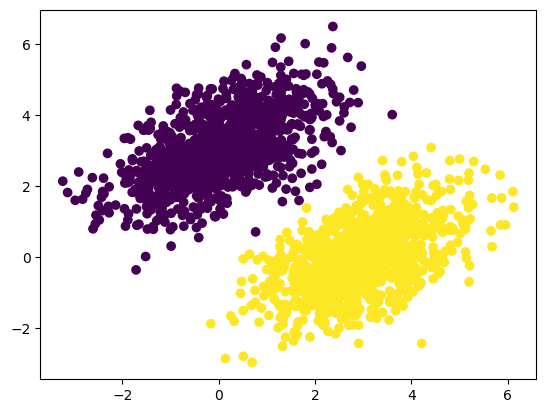

In [13]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

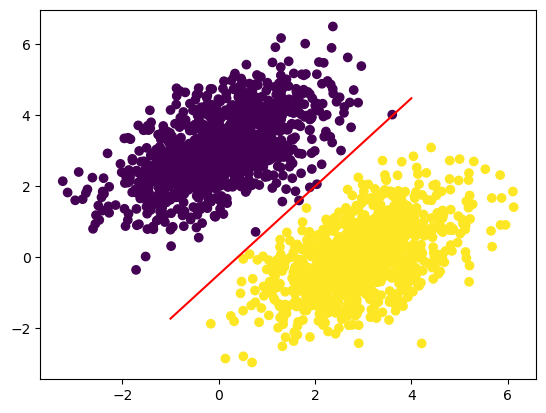

In [14]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)